# Development and Training of a Sinhala (si) Named Entity Recognition (NER) Model for SpaCy Framework

## Ashen Weligalle (thawe276)
## Linköping University, Sweden.

In [1]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
import json

si_nlp= spacy.blank("si") # loading si model
db= DocBin()

# Open and load the JSON file with the correct encoding
with open('./data/si_core_web_sm_train.json', encoding='utf-8') as jsont_dat:
    train_data = json.load(jsont_dat)

with open('./data/si_core_web_sm_valid.json', encoding='utf-8') as jsonv_dat:
    valid_data = json.load(jsonv_dat)

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


Train and valid data open as a JSON format. In the below code snipt convert and save both, train and valid data as a SpaCy object. If there is a span empty with data it indicate as "skipping entity".

In [2]:
# Crating spacy object using train_data and valid_data
for text, annotations in tqdm(train_data['annotations']):
    doc = si_nlp.make_doc(text)
    ents=[]
    for start,end, label in annotations['entities']:
        span= doc.char_span(start,end,label=label,alignment_mode='contract')
        if span is None:
            print('Skipping entity')
        else:
            ents.append(span)
    doc.ents= ents
    db.add(doc)

db.to_disk("./data/si_core_web_sm_train.spacy")

for text, annotations in tqdm(valid_data['annotations']):
    doc = si_nlp.make_doc(text)
    ents=[]
    for start,end, label in annotations['entities']:
        span= doc.char_span(start,end,label=label,alignment_mode='contract')
        if span is None:
            print('Skipping entity')
        else:
            ents.append(span)
    doc.ents= ents
    db.add(doc)

db.to_disk("./data/si_core_web_sm_valid.spacy")

  0%|          | 0/357 [00:00<?, ?it/s]

100%|██████████| 357/357 [00:00<00:00, 1632.29it/s]


Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|██████████| 15/15 [00:00<?, ?it/s]


In [3]:
! python -m spacy init config config.cfg --lang si --pipeline ner --optimize efficiency


✘ The provided output file already exists. To force overwriting the
config file, set the --force or -F flag.



In [4]:
!python -m spacy train config.cfg --output ./model --paths.train ./data/si_core_web_sm_train.spacy --paths.dev ./data/si_core_web_sm_valid.spacy

ℹ Saving to output directory: model
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     51.41    4.94    3.23   10.47    0.05
  2     200       1199.69   6874.78   32.74   43.86   26.12    0.33
  5     400       1610.90   5409.58   65.86   67.78   64.04    0.66
  9     600       1489.28   3802.99   88.10   88.69   87.51    0.88
 14     800       1130.51   2118.96   94.40   94.73   94.07    0.94
 19    1000        981.34   1380.79   96.93   97.55   96.32    0.97
 26    1200        861.88   1051.06   96.73   97.32   96.14    0.97
 35    1400       1035.63    937.87   97.46   97.85   97.07    0.97
 45    1600        984.82    842

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [2]:
si_ner_nlp=spacy.load("./model/model-best")

In [34]:
tex=si_ner_nlp(''' ජනපති හමුවීමට නියමිත චීන ප්‍රධානින් කවුද ?
මෙම සංචාරයේ දී චීන ජනාධිපති ෂී ජින් පිං සමග අනුර කුමාර දිසානායක ජනාධිපතිවරයා, අන්‍යොන්‍ය වශයෙන් උනන්දුවක් දක්වන ක්ෂේත්‍ර ගණනාවක් පිළිබඳව සාකච්ඡා පැවැත්වීමට සැලසුම් කර ඇති බව ශ්‍රී ලංකාවේ විදේශ කටයුතු අමාත්‍යංශය නිවේදනයක් නිකුත් කරමින් පවසයි.

ජනාධිපති අනුර කුමාර දිසානායක මෙම සංචාරයේදී චීන අග්‍රාමාත්‍ය ලී ච්‍යං (Li Qiang) සහ චීන ජාතික මහජන කොංග්‍රසයේ ස්ථාවර කමිටුවේ සභාපති ජාඕ ලීජි ඇතුළු රාජ්‍ය තාන්ත්‍රිකයින් පිරිසක් ද හමුවීමට නියමිත යි.

එමෙන්ම මෙම චීන සංචාරයේදී ජනාධිපති අනුර කුමාර දිසානායක, තාක්ෂණික හා කෘෂිකාර්මික සංවර්ධනය මෙන්ම දිළිඳුකම පිටුදැකීම ආදී අරමුණු පෙරටු කරගත් ක්ෂේත්‍ර චාරිකා කිහිපයකට සහභාගි වීමට නියමිත අතර ඉහළ පෙළේ ව්‍යාපාරික හමු කිහිපයකට එක්වීමට ද සැලසුම් කර තිබේ.

චීන කොමියුනිස්ට් පක්ෂය සමග ඇති සබඳතා මෙන්ම චීන ආයෝජකයින්ට සිත් ඇදගන්නා සුළු ආයෝජන අවස්ථා ලබාදීම හරහා ජනාධිපති අනුර කුමාර දිසානායකට චීනය සමග හොඳ ප්‍රතිරූපයක් ගොඩනගා ගැනීමට හැකි වනු ඇති බව ජාත්‍යන්තර සබඳතා පර්යේෂක සහ උපදේශක ආචාර්ය හසිත් කන්දඋඩහේවා බීබීසී සිංහල සේවයට අදහස් දක්වමින් පැවසීය.''')

In [35]:
spacy.displacy.render(tex,style="ent",jupyter=True)

In [32]:
import json
import pandas as pd
from tabulate import tabulate
from spacy.training import offsets_to_biluo_tags

# Load the test dataset
with open("./data/si_core_web_test.json", "r", encoding="utf-8") as file:
    test_data = json.load(file)

# Extract the actual labeled data from the JSON
annotations = test_data["annotations"]  # Extracting annotations directly

# Function to clean entity labels (remove BIO/BILUO prefixes)
def get_cleaned_label(label: str):
    return label.split("-")[-1] if "-" in label else label

# Extract Named Entity Predictions from SpaCy Model
def get_ner_predictions(text):
    doc = si_ner_nlp(text)
    return [(ent.text, get_cleaned_label(ent.label_)) for ent in doc.ents]

# Extract Actual Named Entities from Dataset
def get_actual_entities(text, entity_data):
    return [(text[start:end], get_cleaned_label(label)) for start, end, label in entity_data]

# Generate Table Data
table_data = []

for annotation in annotations:
    text, entity_info = annotation  # Each entry in annotations is a list [text, {entities: [...] }]
    
    actual_entities = get_actual_entities(text, entity_info["entities"])  # Extract labeled entities
    predicted_entities = get_ner_predictions(text)  # Extract model-predicted entities

    # Compare Predicted vs. Actual Entities
    for (pred_text, pred_label) in predicted_entities:
        actual_label = next((label for entity, label in actual_entities if entity == pred_text), "Unknown")
        table_data.append([pred_text, pred_label, actual_label])

# Convert to Pandas DataFrame for better formatting
df = pd.DataFrame(table_data, columns=["Entity", "Predicted", "Actual"])

# Display Table
print(tabulate(df, headers="keys", tablefmt="grid"))

+----+----------------------+-------------+----------+
|    | Entity               | Predicted   | Actual   |
+====+======================+=============+==========+
|  0 | ජනපති                 | PERSON      | PERSON   |
+----+----------------------+-------------+----------+
|  1 | මෙම සංචාරයේ              | EVENT       | Unknown  |
+----+----------------------+-------------+----------+
|  2 | ජනාධිපති                | PERSON      | PERSON   |
+----+----------------------+-------------+----------+
|  3 | ජින්                   | FAC         | Unknown  |
+----+----------------------+-------------+----------+
|  4 | අනුර කුමාර දිසානායක        | PERSON      | PERSON   |
+----+----------------------+-------------+----------+
|  5 | ජනාධිපතිවරයා             | PERSON      | PERSON   |
+----+----------------------+-------------+----------+
|  6 | අන්‍යොන්‍ය                  | PERSON      | Unknown  |
+----+----------------------+-------------+----------+
|  7 | ක්ෂේත්‍ර ගණනාවක්            | P

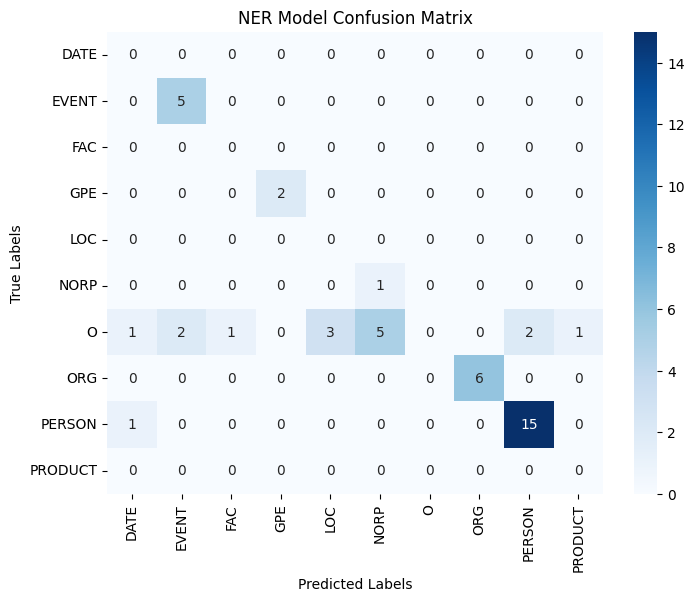


🔹 Classification Report:
              precision    recall  f1-score   support

        DATE       0.00      0.00      0.00         0
       EVENT       0.71      1.00      0.83         5
         FAC       0.00      0.00      0.00         0
         GPE       1.00      1.00      1.00         2
         LOC       0.00      0.00      0.00         0
        NORP       0.17      1.00      0.29         1
           O       0.00      0.00      0.00        15
         ORG       1.00      1.00      1.00         6
      PERSON       0.88      0.94      0.91        16
     PRODUCT       0.00      0.00      0.00         0

    accuracy                           0.64        45
   macro avg       0.38      0.49      0.40        45
weighted avg       0.57      0.64      0.60        45



c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [ ]:
# This evaluation matrix cortesi goes to https://gist.github.com/dulaj-rajitha/4fb266e0e2261c1633229b3c96339ab7 and https://learn.microsoft.com/en-us/azure/ai-services/language-service/custom-named-entity-recognition/concepts/evaluation-metrics

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Map "Unknown" to "O" (non-entity) to ensure proper classification
df["Actual"] = df["Actual"].replace("Unknown", "O")

# Ensure no missing (NaN) values exist
df.dropna(inplace=True)  # Remove any rows with NaN values


# Extract unique labels (sorted to match prediction and actual labels)
labels = sorted(set(df["Predicted"].unique()).union(set(df["Actual"].unique())))

# Generate Confusion Matrix
cm = confusion_matrix(df["Actual"], df["Predicted"], labels=labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("NER Model Confusion Matrix")
plt.show()

# Print Classification Report
print("\n🔹 Classification Report:")
print(classification_report(df["Actual"], df["Predicted"], target_names=labels))